# Dust extinction models in Rubix

This notebook shows the basics of the dust extinction models implemented in Rubix. We have closely followed the implementation by the [dust extinction package](https://dust-extinction.readthedocs.io/en/latest/index.html). Currently we only support a subset of all available models.

In [1]:
# NBVAL_SKIP
from rubix.spectra.dust.extinction_models import Cardelli89

/Users/buck/Documents/Nexus/Projects/rubix/rubix/spectra/dust/extinction_models.py:162: SyntaxWarning: invalid escape sequence '\m'
  """


In [2]:
import matplotlib.pyplot as plt
import numpy as np

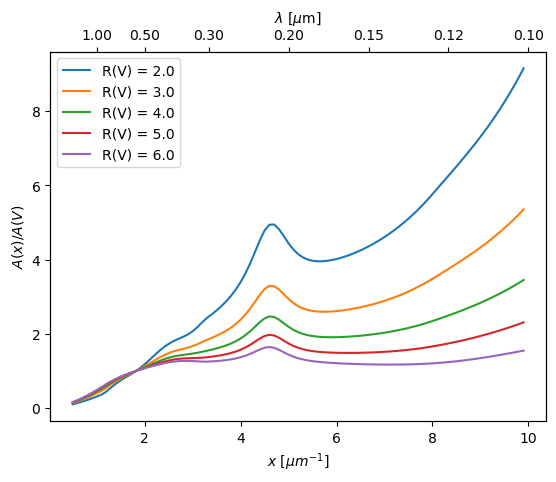

In [4]:
# NBVAL_SKIP
fig, ax = plt.subplots()

# generate the curves and plot them
x = np.arange(0.5,10.0,0.1) # in 1/microns
Rvs = [2.0,3.0,4.0,5.0,6.0]
for cur_Rv in Rvs:
    ext_model = Cardelli89(Rv=cur_Rv)
    ax.plot(x,ext_model(x),label='R(V) = ' + str(cur_Rv))

ax.set_xlabel(r'$x$ [$\mu m^{-1}$]')
ax.set_ylabel(r'$A(x)/A(V)$')

# for 2nd x-axis with lambda values
axis_xs = np.array([0.1, 0.12, 0.15, 0.2, 0.3, 0.5, 1.0])
new_ticks = 1 / axis_xs
new_ticks_labels = ["%.2f" % z for z in axis_xs]
tax = ax.twiny()
tax.set_xlim(ax.get_xlim())
tax.set_xticks(new_ticks)
tax.set_xticklabels(new_ticks_labels)
tax.set_xlabel(r"$\lambda$ [$\mu$m]")

ax.legend(loc='best')

In [20]:
Cardelli89()

TypeError: Cardelli89.__init__() missing 4 required positional arguments: 'wave', 'wave_range', 'Rv', and 'Rv_range'

# Load SSP template via custom config

This shows how to use a custom configuration to load an SSP template that is stored under some file location on your disk.

In [3]:
# NBVAL_SKIP
config = {
        "name": "Bruzual & Charlot (2003)",
        "format": "HDF5",
        "source": "https://www.bruzual.org/bc03/",
        "file_name": "BC03lr.h5",
        "fields": {
            "age": {
                "name": "age",
                "units": "Gyr",
                "in_log": False
            },
            "metallicity": {
                "name": "metallicity",
                "units": "",
                "in_log": False
            },
            "wavelength": {
                "name": "wavelength",
                "units": "Angstrom",
                "in_log": False
            },
            "flux": {
                "name": "flux",
                "units": "Lsun/Angstrom",
                "in_log": False
            }
        }
    }

In [4]:
# NBVAL_SKIP
from rubix.spectra.ssp.grid import HDF5SSPGrid
ssp = HDF5SSPGrid.from_file(config, file_location="../rubix/spectra/ssp/templates")
ssp

HDF5SSPGrid(age=Array([ 0.       ,  5.100002 ,  5.1500006,  5.1999993,  5.25     ,
        5.3000016,  5.350002 ,  5.4000006,  5.4500012,  5.500002 ,
        5.550002 ,  5.600002 ,  5.6500025,  5.700002 ,  5.750002 ,
        5.8000026,  5.850003 ,  5.900003 ,  5.950003 ,  6.       ,
        6.0200005,  6.040001 ,  6.0599985,  6.0799985,  6.100002 ,
        6.120001 ,  6.1399984,  6.16     ,  6.18     ,  6.1999993,
        6.2200007,  6.24     ,  6.2599998,  6.2799997,  6.2999997,
        6.3199987,  6.3399997,  6.3600006,  6.3799996,  6.3999987,
        6.4200006,  6.44     ,  6.4599996,  6.4799995,  6.499999 ,
        6.52     ,  6.539999 ,  6.56     ,  6.5799994,  6.6      ,
        6.6199994,  6.6399994,  6.66     ,  6.679999 ,  6.699999 ,
        6.72     ,  6.7399993,  6.7599993,  6.7799997,  6.799999 ,
        6.819999 ,  6.839999 ,  6.8599997,  6.879999 ,  6.899999 ,
        6.919999 ,  6.939999 ,  6.959999 ,  6.9799986,  6.999999 ,
        7.0200005,  7.040001 ,  7.0599985,  7.

In [5]:
# NBVAL_SKIP
ssp.age.shape

(221,)

In [6]:
# NBVAL_SKIP
ssp.metallicity.shape

(6,)

In [7]:
# NBVAL_SKIP
ssp.wavelength.shape

(842,)

In [8]:
# NBVAL_SKIP
ssp.flux.shape

(6, 221, 842)

# Let's plot some example spectra

In [9]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Flux [Lsun/Angstrom]')

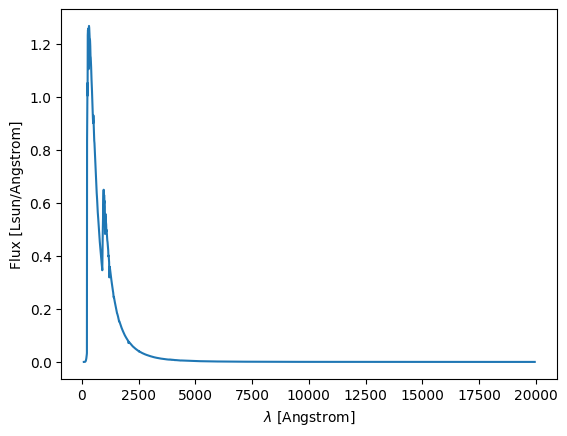

In [10]:
# NBVAL_SKIP
plt.plot(ssp.wavelength,ssp.flux[0][0])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")

Text(0, 0.5, 'Flux [Lsun/Angstrom]')

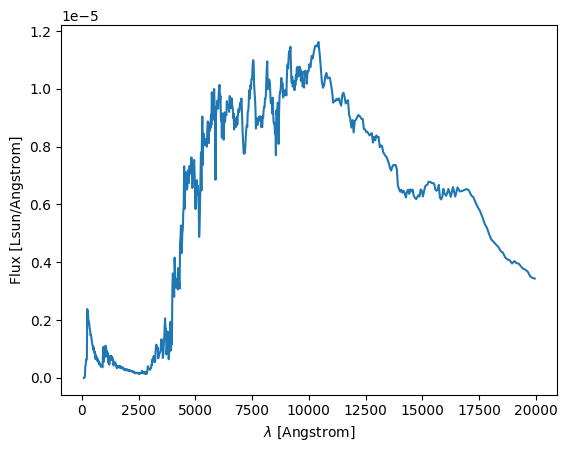

In [11]:
# NBVAL_SKIP
plt.plot(ssp.wavelength,ssp.flux[-1][-1])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")

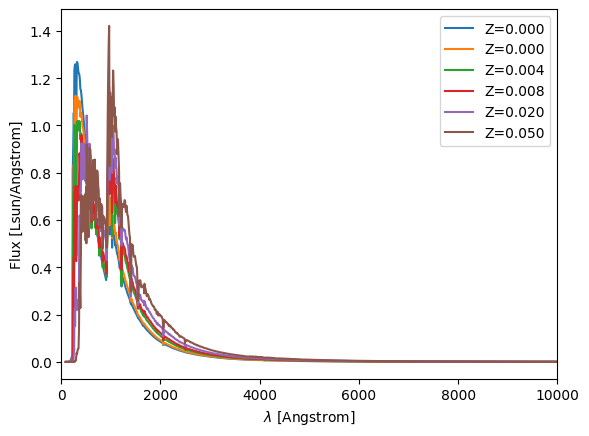

In [12]:
# NBVAL_SKIP
for i in range(len(ssp.metallicity)):
    plt.plot(ssp.wavelength,ssp.flux[i][0], label=r'Z=%0.3f'%ssp.metallicity[i])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(0,10000)
plt.legend()

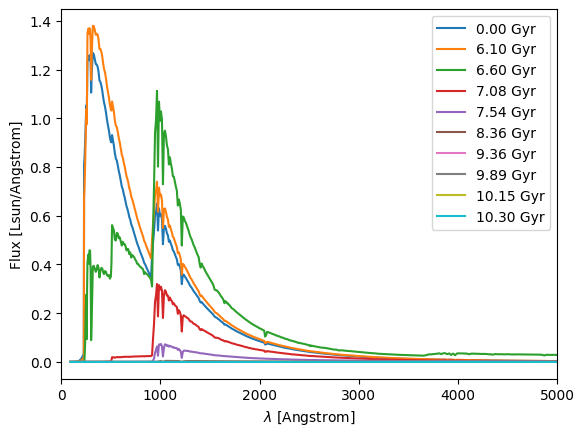

In [13]:
# NBVAL_SKIP
ages = np.linspace(0,len(ssp.age),10)
for age in ages:
    plt.plot(ssp.wavelength,ssp.flux[0][int(age)], label='%.2f %s'%(ssp.age[int(age)], config["fields"]["age"]["units"]))
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(0,5000)
plt.legend()

# Automatic download supported SSP template
Rubix supports automatic download of a supported SSP template from a specified url in case the template can't be found on disk under the file_location specified.

In [ ]:
# NBVAL_SKIP
config = {
        "name": "Mastar Charlot & Bruzual (2019)",
        "format": "pyPipe3D",
        "source": "https://ifs.astroscu.unam.mx/pyPipe3D/templates/",
        "file_name": "MaStar_CB19.slog_1_5.fits.gz",
        "fields": {
            "age": {
                "name": "age",
                "units": "Gyr",
                "in_log": False
            },
            "metallicity": {
                "name": "metallicity",
                "units": "",
                "in_log": False
            },
            "wavelength": {
                "name": "wavelength",
                "units": "Angstrom",
                "in_log": False
            },
            "flux": {
                "name": "flux",
                "units": "Lsun/Angstrom",
                "in_log": False
            }
        }
    }

In [ ]:
# NBVAL_SKIP
from rubix.spectra.ssp.grid import pyPipe3DSSPGrid
ssp = pyPipe3DSSPGrid.from_file(config, file_location="../rubix/spectra/ssp/templates")
ssp

In [ ]:
# NBVAL_SKIP
ssp.age.shape

In [ ]:
# NBVAL_SKIP
ssp.metallicity.shape

In [ ]:
# NBVAL_SKIP
ssp.wavelength.shape

In [ ]:
# NBVAL_SKIP
ssp.flux.shape

# Lets plot some example spectra
Example for Mastar templates

In [ ]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# NBVAL_SKIP
plt.plot(ssp.wavelength,ssp.flux[0][0])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")

In [ ]:
# NBVAL_SKIP
plt.plot(ssp.wavelength,ssp.flux[-1][-1])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")

In [ ]:
# NBVAL_SKIP
for i in range(len(ssp.metallicity)):
    plt.plot(ssp.wavelength,ssp.flux[i][0], label=r'Z=%0.3f'%ssp.metallicity[i])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,10000)
plt.legend()

In [ ]:
# NBVAL_SKIP
ages = np.linspace(0,len(ssp.age),10)
for age in ages:
    plt.plot(ssp.wavelength,ssp.flux[0][int(age)], label='%.2f %s'%(ssp.age[int(age)], config["fields"]["age"]["units"]))
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,5000)
plt.legend()